### 1. Import Modules and Define Global Variables

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
!pip3 -q install pytorch_lightning
!pip3 -q install test-tube

     |████████████████████████████████| 849kB 7.5MB/s 
     |████████████████████████████████| 184kB 15.7MB/s 
     |████████████████████████████████| 276kB 22.7MB/s 
     |████████████████████████████████| 829kB 26.0MB/s 
     |████████████████████████████████| 112kB 43.6MB/s 
     |████████████████████████████████| 1.3MB 29.5MB/s 
     |████████████████████████████████| 296kB 52.1MB/s 
     |████████████████████████████████| 143kB 50.7MB/s 


In [3]:
import sys
sys.path.append('/content/gdrive/MyDrive/11785_SceneDetection_Quantization')
import yaml
from model.beta_vae import *
from trainer import *
from scene_detection import *

%cd '/content/gdrive/MyDrive/11785_SceneDetection_Quantization'

/content/gdrive/MyDrive/11785_SceneDetection_Quantization


In [4]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

### 2. Model Training

In [5]:
model = BetaVAE(**config['model_params'])

In [6]:
#model_trainer = Trainer(model, config['exp_params'], trained_model='Model_20210416')
model_trainer = Trainer(model, config['exp_params'])

In [7]:
model_trainer.fit()

------Epoch 1------
Train: total_loss:17.621131, recon_loss:0.388456, kld:17.232675
Val  : total_loss:0.324781, recon_loss:0.291836, kld:0.032945
=> save new model './best_model/Model_20210416'


------Epoch 2------
Train: total_loss:8.788781, recon_loss:0.345702, kld:8.443079
Val  : total_loss:0.395700, recon_loss:0.292286, kld:0.103415


------Epoch 3------
Train: total_loss:5.725802, recon_loss:0.324567, kld:5.401236
Val  : total_loss:0.547552, recon_loss:0.292576, kld:0.254976


------Epoch 4------
Train: total_loss:4.024763, recon_loss:0.313811, kld:3.710951
Val  : total_loss:0.692283, recon_loss:0.293118, kld:0.399165


------Epoch 5------
Train: total_loss:2.754555, recon_loss:0.295386, kld:2.459169
Val  : total_loss:0.829145, recon_loss:0.293503, kld:0.535642


------Epoch 6------
Train: total_loss:2.339512, recon_loss:0.278459, kld:2.061053
Val  : total_loss:0.914973, recon_loss:0.293875, kld:0.621098


------Epoch 7------
Train: total_loss:1.760160, recon_loss:0.292444, kld:1.467716
Val  : total_loss:0.968995, recon_loss:0.293575, kld:0.675420


------Epoch 8------
Train: total_loss:1.360434, recon_loss:0.287007, kld:1.073427
Val  : total_loss:0.993245, recon_loss:0.291972, kld:0.701273


------Epoch 9------
Train: total_loss:1.208716, recon_loss:0.286498, kld:0.922219
Val  : total_loss:0.995741, recon_loss:0.289811, kld:0.705931


------Epoch 10------
Train: total_loss:1.242638, recon_loss:0.274939, kld:0.967699
Val  : total_loss:0.936857, recon_loss:0.288312, kld:0.648545


### 3. Scene Change Detection

In [8]:
model = BetaVAE(**config['model_params'])
scene_detector = Scene_Detection(model, config['exp_params'], trained_model = 'Model_20210416')

=> loaded checkpoint './best_model/Model_20210416'


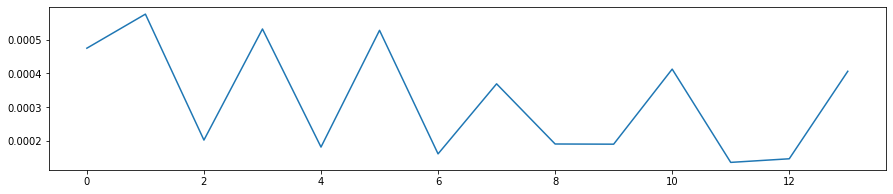

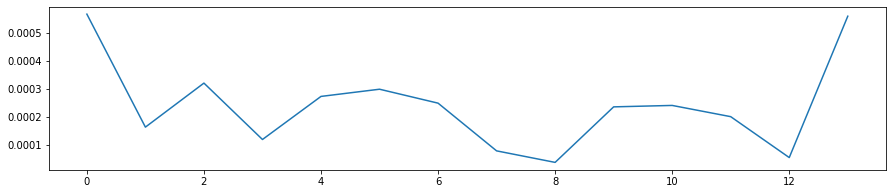

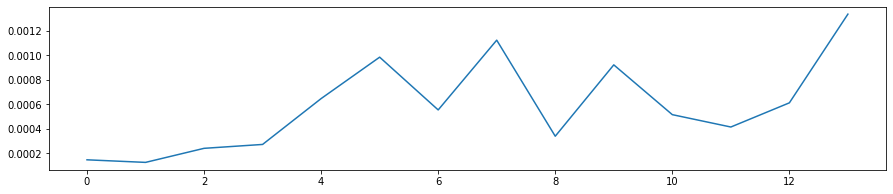

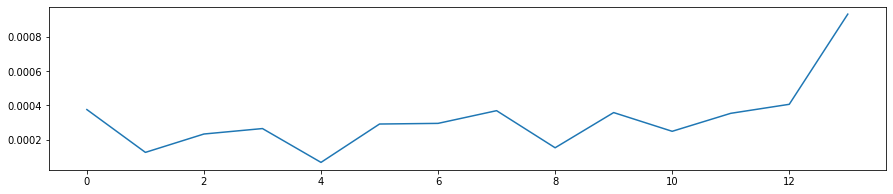

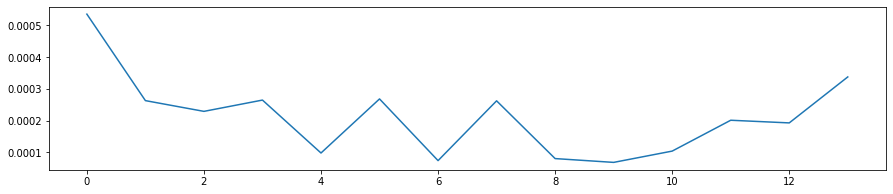

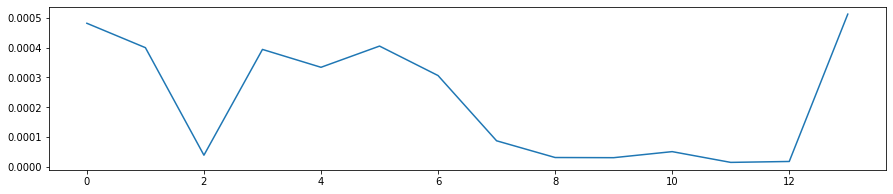

In [9]:
scene_detector.compute_scene_KL_divergence()